In [ ]:
# Import pandas_datareader
import pandas_datareader as pdr


In [ ]:
# Get the data for TCS
data = pdr.get_data_yahoo('TCS.NS', '2010-1-1', '2020-10-5')


In [ ]:
# Print last 2 rows of the data
data.tail(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-05,2728.100098,2603.050049,2620.0,2705.800049,17412105.0,2705.800049
2020-10-06,2736.000000,2650.100098,2736.0,2669.199951,4875378.0,2669.199951


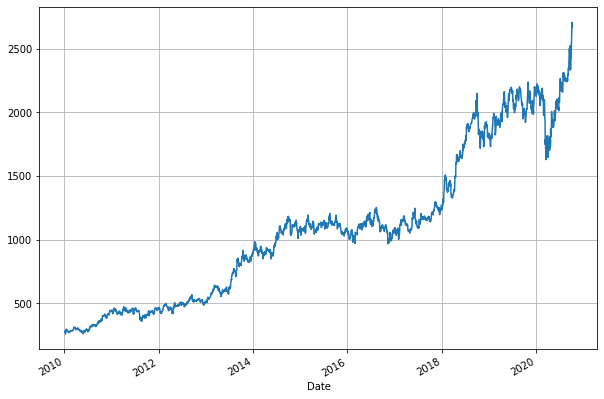

In [ ]:
# Plot the Close Price

# Import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Call the plot method
data['Adj Close'].plot(figsize=(10, 7), grid=True)
plt.show()


In [ ]:
# Compute the percentage change

# Previous day close to today's open
data['overnight_returns'] = (
    data['Open']-data['Close'].shift(1))/data['Close'].shift(1)

# Open to Close
data['intraday_returns'] = (data['Close']-data['Open'])/data['Open']

data.head(3)

,High,Low,Open,Close,Volume,Adj Close,overnight_returns,intraday_returns
Date,,,,,,,,
2010-01-04,379.450012,374.524994,377.399994,375.825012,1963682.0,279.167419,NaN,-0.004173
2010-01-05,379.774994,373.274994,377.500000,375.924988,2014488.0,279.241699,0.004457,-0.004172
2010-01-06,376.100006,366.500000,375.924988,367.424988,3349176.0,272.927704,0.000000,-0.022611


In [ ]:
# Define your conditions on which you want to trade
cond_1 = data.overnight_returns < -0.01
cond_2 = data.overnight_returns > -0.02

# Store it in the signal columns of dataframe data
data['signal'] = np.where(cond_1 & cond_2, 1, 0)

data.head()

,High,Low,Open,Close,Volume,Adj Close,overnight_returns,intraday_returns,signal
Date,,,,,,,,,
2010-01-04,379.450012,374.524994,377.399994,375.825012,1963682.0,279.167419,NaN,-0.004173,0
2010-01-05,379.774994,373.274994,377.500000,375.924988,2014488.0,279.241699,0.004457,-0.004172,0
2010-01-06,376.100006,366.500000,375.924988,367.424988,3349176.0,272.927704,0.000000,-0.022611,0
2010-01-07,369.700012,355.500000,367.750000,357.200012,6474892.0,265.332550,0.000885,-0.028688,0
2010-01-08,359.250000,348.250000,358.000000,349.899994,6048178.0,259.909882,0.002240,-0.022626,0


In [ ]:
data.loc[data.signal==1].head()


,High,Low,Open,Close,Volume,Adj Close,overnight_returns,intraday_returns,signal
Date,,,,,,,,,
2010-01-22,382.500000,372.350006,380.5,378.924988,7574990.0,281.470093,-0.012522,-0.004139,1
2010-01-29,369.899994,356.075012,367.0,368.100006,5473326.0,274.883209,-0.010448,0.002997,1
2010-05-05,384.000000,370.075012,375.0,382.875000,4371230.0,285.916626,-0.014455,0.021000,1
2010-05-07,381.299988,367.500000,378.5,370.700012,4267152.0,276.824890,-0.013166,-0.020608,1
2010-05-25,357.000000,345.774994,354.0,349.774994,2297366.0,261.198792,-0.013378,-0.011935,1


In [ ]:
# Compute the strategy returns
strategy_returns = data.signal * data.intraday_returns

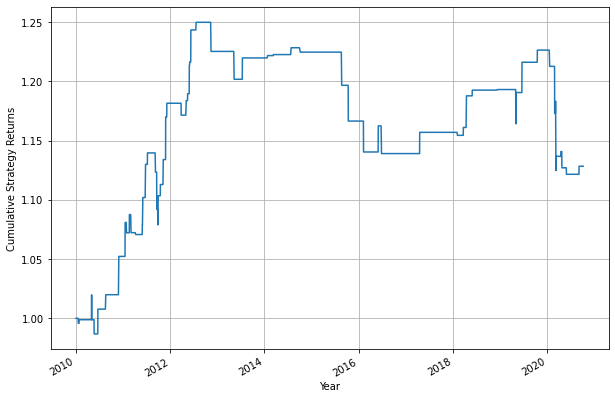

In [ ]:
# Plot the cumulative strategy returns
(strategy_returns+1).cumprod().plot(figsize=(10, 7), grid=True)
plt.xlabel('Year')
plt.ylabel('Cumulative Strategy Returns')
plt.show()


Start date,2010-01-04
End date,2020-10-06
Total months,126
,Backtest
Annual return,1.2%
Cumulative returns,12.8%
Annual volatility,4.2%
Sharpe ratio,0.29
Calmar ratio,0.11
Stability,0.15
Max drawdown,-10.3%


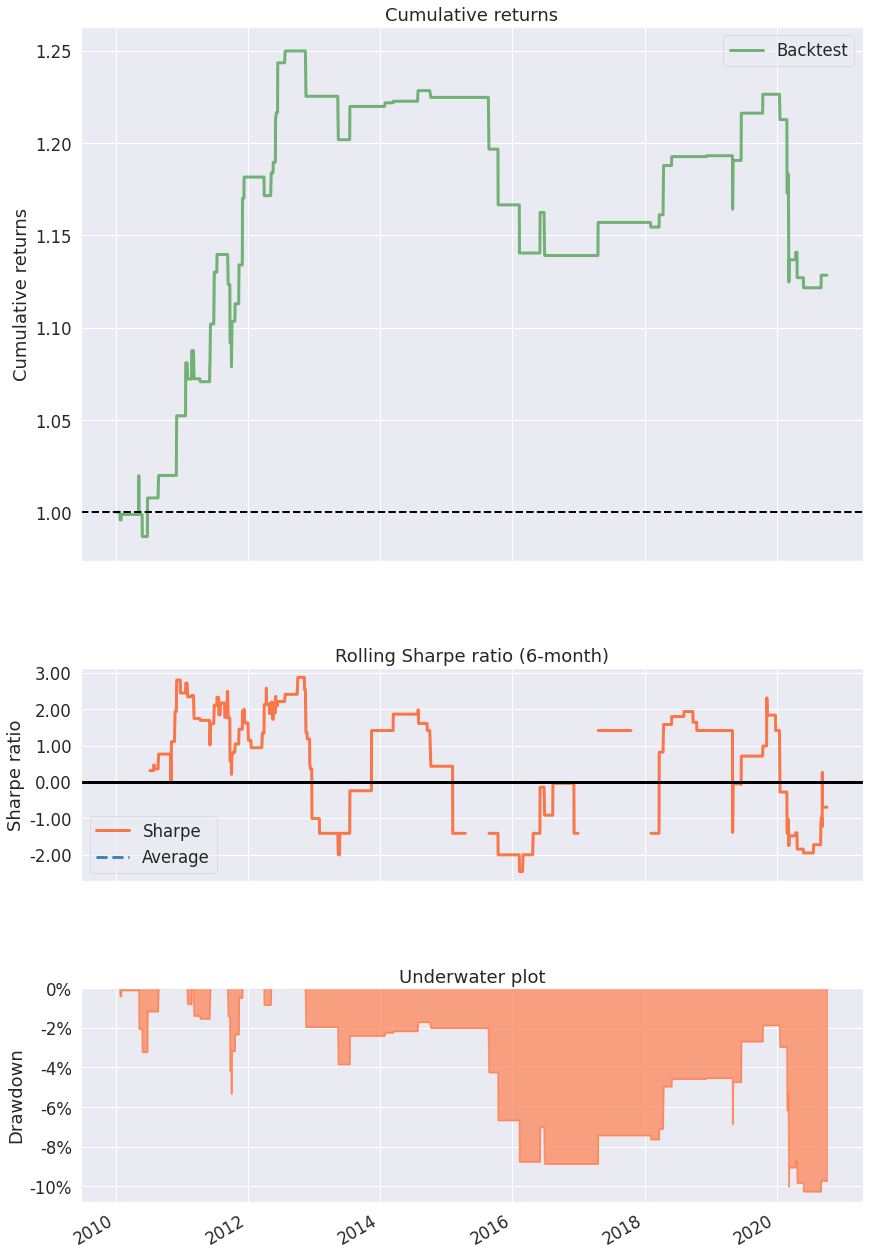

In [ ]:
# Detailed performance analysis
!pip install pyfolio
import pyfolio as pf
pf.create_simple_tear_sheet(strategy_returns)


Stress Events,mean,min,max
US downgrade/European Debt Crisis,0.00%,0.00%,0.00%
Fukushima,-0.01%,-0.15%,-0.00%
EZB IR Event,0.00%,0.00%,0.00%
Flash Crash,0.01%,-2.06%,2.10%
Apr14,0.00%,0.00%,0.00%
Oct14,-0.02%,-0.30%,0.00%
Fall2015,-0.07%,-2.29%,-0.00%
Recovery,0.03%,-2.80%,3.18%
New Normal,-0.00%,-4.95%,2.30%


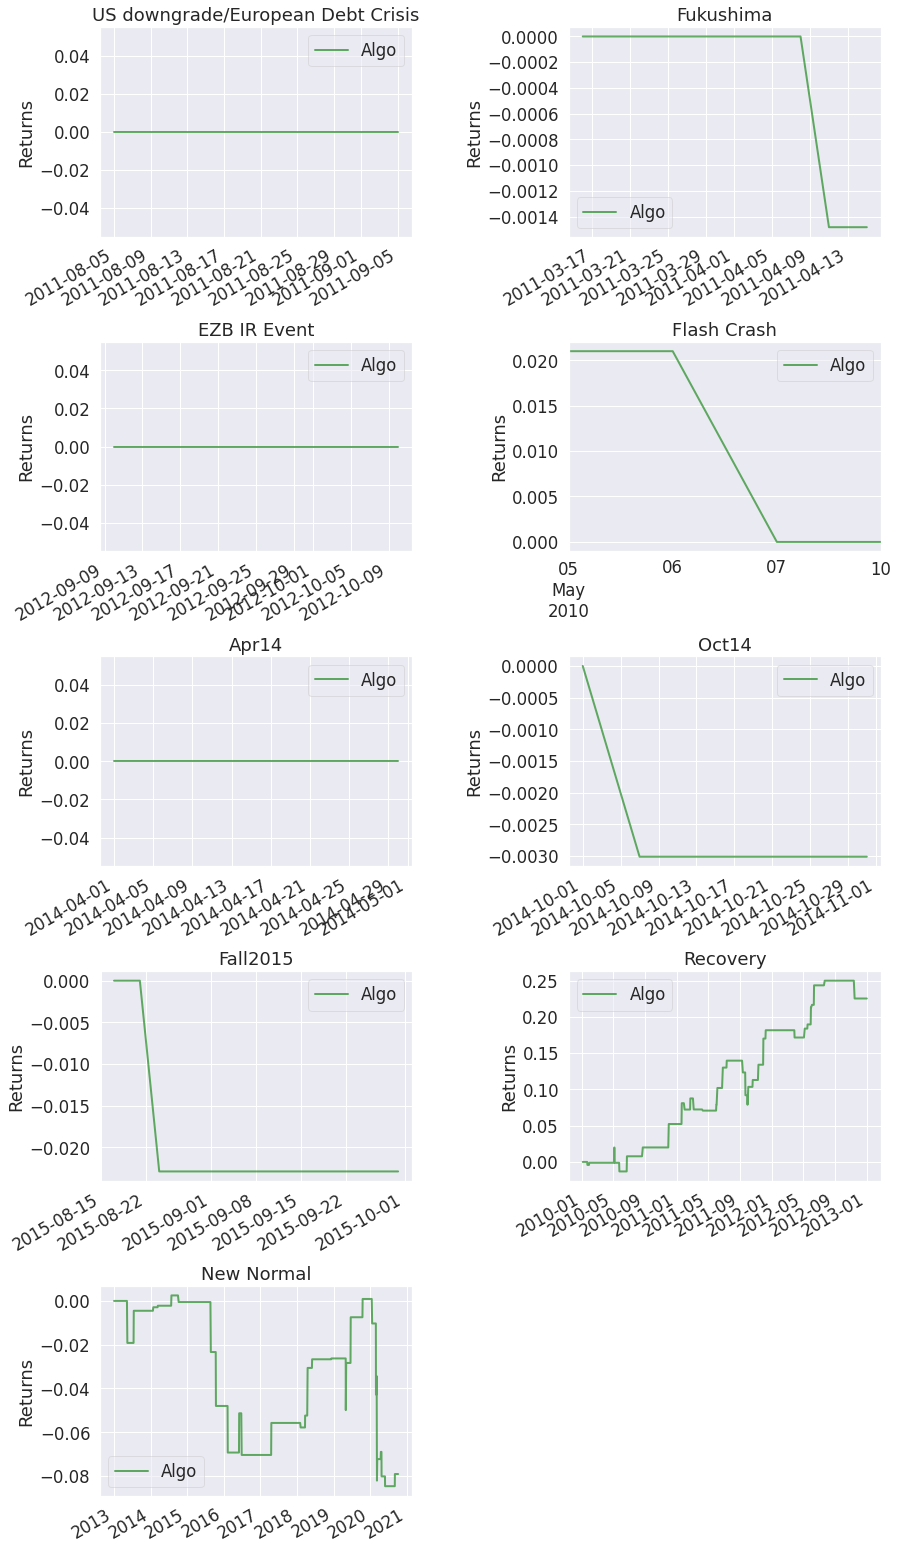

In [ ]:
# Detailed performance analysis
!pip install pyfolio
import pyfolio as pf
pf.create_interesting_times_tear_sheet(strategy_returns)
